In [1]:
import pandas as pd
import requests
import zipfile
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import Image
from IPython.core.display import HTML 
import seaborn as sns

**Gather Data**

In [2]:
#gather data from twitter archve csv file
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
476,816014286006976512,NaN,NaN,2017-01-02 20:12:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Larry. He has no self c...,7.320056e+17,4.196984e+09,2016-05-16 00:31:53 +0000,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,None,None,None,None
2303,666996132027977728,NaN,NaN,2015-11-18 15:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carll. He wants to be a donkey. But al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666996132...,10,10,Carll,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None


In [3]:
#Since the file is on Udacity's server we use the request library to request the url and 
#then the response is written on a tsv file which is then read using pandas read_csv function

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)

In [4]:
with open("image-predictions.tsv",mode='wb')as file:
    file.write(response.content)

In [5]:
#Read TSV file

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )


In [6]:
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
436,674410619106390016,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1,brown_bear,0.698207,False,sea_lion,0.046475,False,beagle,0.019427,True
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
1965,867421006826221569,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True


In [ ]:
#Gather data from twitter API
consumer_key = #
consumer_secret = #
access_token = #
access_token_secret = #
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, 
                parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                wait_on_rate_limit_notify = True)

In [ ]:
Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
#Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:  
   
  
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [ ]:
my_list_of_jason=[]
for each_jason in list_of_tweets:
    my_list_of_jason.append(each_jason)
    

In [ ]:
#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_jason))

In [7]:
tweet_data = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_item in all_data:
        
        tweet_id=each_item['id']
        favorite_count = each_item['favorite_count']
        retweet_count = each_item['retweet_count']
        tweet_text = each_item['text']
        followers_count = each_item['user']['followers_count']
        
        tweet_data.append({'tweet_id': tweet_id,
                   'favorite_count': favorite_count,
                   'retweet_count': retweet_count,
                   'followers_count':followers_count,
                   'tweet_text':tweet_text})

tweet_df=pd.DataFrame(tweet_data,columns=['tweet_id','retweet_count','favorite_count','followers_count','tweet_text'])
                    
                             
                  
                             
                          

In [8]:
#check the df
len(tweet_df)

2333

** Assess Data**

In [9]:
#increase the column width in pandas to see the full tweets
pd.set_option('display.max_colwidth', 200)

In [10]:
tweet_df.sample(5)

,tweet_id,retweet_count,favorite_count,followers_count,tweet_text
2093,670427002554466305,160,517,8367921,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo
814,768193404517830656,3706,11285,8367829,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq
1550,687664829264453632,517,1983,8367851,Meet Opal. He's a Belgian Dijon Poofster. Upset because his hood makes him look like blond Justin Timberlake. 11/10 https://t.co/IAt3jRZ5ez
220,848212111729840128,3086,16500,8367809,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, J… https://t.co/KUBZuymfjF"
2315,666104133288665088,6154,13764,8367926,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX


In [11]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 5 columns):
tweet_id           2333 non-null int64
retweet_count      2333 non-null int64
favorite_count     2333 non-null int64
followers_count    2333 non-null int64
tweet_text         2333 non-null object
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


**Assess Twitter Archive** 

In [14]:
#assess visually
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [15]:
#check for duplicates in id
sum(twitter_archive['tweet_id'].duplicated())

0

In [16]:
# missing dog classification data
no_dog_classification=twitter_archive[(twitter_archive['doggo']=='None') &
                                      (twitter_archive['floofer']=='None') & 
                                      (twitter_archive['pupper']=='None') &
                                      (twitter_archive['puppo']=='None') ]

len(no_dog_classification)

1976

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
#find out those records where denominator is not 10
not10_denominator=twitter_archive[(twitter_archive['rating_denominator']>10) | (twitter_archive['rating_denominator']<10)]
not10_denominator                            
                            

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitte

In [19]:
#merge those records with image_prediction to find out their images
df_denominator_not10=pd.merge(not10_denominator,image_prediction,on='tweet_id')

In [20]:
#Assess those tweets 
denominator_not10_jpg=df_denominator_not10[['tweet_id','jpg_url','rating_numerator','rating_denominator','text']]
denominator_not10_jpg




,tweet_id,jpg_url,rating_numerator,rating_denominator,text
0,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
1,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
2,758467244762497024,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
3,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,9,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
4,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,204,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
5,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,4,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
6,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
7,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,99,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
8,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
9,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,45,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"


In [21]:
#check those tweets for their images 
im1 = Image(url= "https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg", width=100, height=100)
im2 = Image(url= "https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg", width=100, height=100)
im3 = Image(url= "https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg", width=100, height=100)
im4 = Image(url= "https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg", width=100, height=100)
im5 = Image(url= "https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg", width=100, height=100)
im6 = Image(url= "https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg", width=100, height=100)
im7 = Image(url= "https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg", width=100, height=100)
im8 = Image(url= "https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg", width=100, height=100)
im9 = Image(url= "https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg", width=100, height=100)
im10 = Image(url= "https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg", width=100, height=100)

im11 = Image(url= "https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg", width=100, height=100)


display(*[im1,im2,im3,im4,im5,im6,im7,im8,im9,im10,im11]);

#conclusion: the denominator is more than 10 because most of these have more than 1 dog

In [22]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
#Assess unusual numerators
numerator_morethan_15=twitter_archive[twitter_archive['rating_numerator']>15]
len(numerator_morethan_15)

26

In [24]:
numerator_morethan_15.sort_values('rating_numerator', 
    ascending = False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None


In [25]:
numerator_morethan_15_version=numerator_morethan_15[['tweet_id','rating_numerator','rating_denominator','text']]
len(numerator_morethan_15_version)  


                                                                                                                                            

26

In [26]:
weird_ratings=pd.merge(numerator_morethan_15,image_prediction,on='tweet_id')
weird_ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
1,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
2,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
3,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
4,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
5,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
6,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
7,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
8,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a benc

In [27]:
pd.set_option('display.max_colwidth', 200)
weird_ratings_version=weird_ratings[['tweet_id','text','jpg_url','rating_numerator','rating_denominator']]
weird_ratings_version



,tweet_id,text,jpg_url,rating_numerator,rating_denominator
0,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,84,70
1,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,24,7
2,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,75,10
3,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,27,10
4,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,165,150
5,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1776,10
6,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,204,170
7,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,50,50
8,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,99,90
9,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,80,80


In [28]:
#check the images to find out why the ratings are weird

im1 = Image(url= "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg", width=100, height=100)
display(*[im1,im2]);#749981277374128128-this dog has a rating numerator of 1776 because its 
#the year of American Independednce
im2 = Image(url= "https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg", width=100, height=100)



Findings:
- wherever the numerator rating is a float, the number after the decimal is displayed in the 'rating_numerator' column
- multiple dogs therefore the numerator is more than 15
- special cases like the dog wearing the American flag so rating is 1776-the American Independence year

In [29]:
#check the name column 
twitter_archive.groupby('name').size()

#finding: a lot of names are English words like (a, an,the, my,very,not,by,his,all).
#This is incorrect data 
# Some names are in lower case

            
               

        
       

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

In [30]:
#We only want original ratings (no retweets) . Check for retweets
retweets=twitter_archive[twitter_archive.retweeted_status_id.notnull()]     
len(retweets)


181

In [31]:
retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,h...",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https

**Assess Image Prediction**

In [32]:
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,beagle,0.848735,True,Ibizan_hound,0.044603,True,Italian_greyhound,0.018611,True
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True


In [33]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [35]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 5 columns):
tweet_id           2333 non-null int64
retweet_count      2333 non-null int64
favorite_count     2333 non-null int64
followers_count    2333 non-null int64
tweet_text         2333 non-null object
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


**Quality Issues** (Content issues-Check for dirty data, missing, incorrect or duplicate data)


**twitter archive**

- Only keep original tweets, remove retweets
- Remove the unnecessary columns related to retweets like 'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.
- timestamp should be datetime
- correct the numerator rating where its float as it incorrectly reflects the number after decimal; inconsistent rating numerator and denominator
- dog category (pupper,dogger,puppo,floofer) should be a category instead of an object data type
- tweet_id should be string and not int data type



**image_prediction**

- tweet_id should be string and not int data type
- change column names to be more informative
- Capitalize all names

**tweet_df**

- tweet_id should be string and not int data type


**Tidiness Issues** (Structural issues or messy data e.g each variable forms a column, each observation froms a row and each type of observation unit forms a table)

- melt the 4 dog category columns into 1 category column in twitter_archive
- all the datasets should be merged into one final dataset 

**Cleaning**

In [36]:
#Make copies of data
twitter_archive_clean=twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_df_copy=tweet_df.copy()

We are going to clean the data in the Define,Code & Test way

**Define**

We only want to keep original tweets so we have to cut the retweets that are present in the data.One way to find retweets is by checking 'retweeted_status_id' to be notnull. Also remove the unnecessary columns related with retweets like 'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'


**Code**

In [37]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]



In [38]:
len(twitter_archive_clean)

2175

In [39]:
twitter_archive_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id', 
    'retweeted_status_id', 'retweeted_status_user_id',
    'retweeted_status_timestamp'], inplace = True, axis = 1) 

In [40]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitt

**Define:**

timestamp should be datetime


**Code**

In [41]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

**Test**

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


**Tidiness Issue-Define**

Replace the 4 dog category columns("doggo", "floofer", "pupper", "puppo") with 1 'stage' column 

**Code**

In [43]:
twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})


,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1831
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [44]:
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [45]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'


In [46]:
twitter_archive_clean=twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

**Test**

In [47]:
twitter_archive_clean.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.9+ KB


**Define**

- Convert the ratings to float
- Manually correct the numerator rating where its in decimals.
- Delete the records where there is no rating.
- Manually correct the records where rating have been incorrectly recorded.We will keep the ratings for multiple dogs where numerator and denominator exceed 10

- Create a new column called 'ratings' (rating_numerator/rating_denominator)

**Code**

In [49]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 169.9+ KB


In [50]:

#create a 'ratings' column which is a fraction of rating num/rating denom
#Find out the texts where rating is in float, then manually correct those numerators
display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [51]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==883482846933004288),'rating_numerator']=13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==786709082849828864),'rating_numerator']=9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==778027034220126208),'rating_numerator']=11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==681340665377193984),'rating_numerator']=9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==68049472664306892),'rating_numerator']=11.26



**Test1**

In [52]:
display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.00,10.0


In [53]:
#look for cases where denominator is not 10
twitter_archive_clean[(twitter_archive_clean['rating_denominator']>10) | (twitter_archive_clean['rating_denominator']<10)][['tweet_id','rating_numerator','rating_denominator','text']]


,tweet_id,rating_numerator,rating_denominator,text
313,835246439529840640,960.0,0.0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,832088576586297345,11.0,15.0,@docmisterio account started on 11/15/15
433,820690176645140481,84.0,70.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,24.0,7.0,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902,758467244762497024,165.0,150.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,9.0,11.0,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,204.0,170.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,4.0,20.0,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,50.0,50.0,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,713900603437621249,99.0,90.0,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1


In [54]:
#Manually fix the ratings where denominator and numerator were incorrectly recorded.

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==835246439529840640),'rating_denominator']=10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==835246439529840640),'rating_numerator']=13
#delete 832088576586297345,810984652412424192

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==740373189193256964),'rating_denominator']=10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==740373189193256964),'rating_numerator']=14

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==722974582966214656),'rating_denominator']=10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==722974582966214656),'rating_numerator']=13

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==716439118184652801),'rating_denominator']=10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==716439118184652801),'rating_numerator']=11


twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==682962037429899265),'rating_denominator']=10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==682962037429899265),'rating_numerator']=10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==666287406224695296),'rating_denominator']=10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==666287406224695296),'rating_numerator']=9




In [55]:
#Delete the ones where there is no rating
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]

In [56]:
twitter_archive_clean['ratings']=twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']

**Test2**

In [57]:
twitter_archive_clean[(twitter_archive_clean['rating_denominator']>10) | (twitter_archive_clean['rating_denominator']<10)][['tweet_id','rating_numerator','rating_denominator','text']]


,tweet_id,rating_numerator,rating_denominator,text
433,820690176645140481,84.0,70.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902,758467244762497024,165.0,150.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120,731156023742988288,204.0,170.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1228,713900603437621249,99.0,90.0,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,710658690886586372,80.0,80.0,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,709198395643068416,45.0,50.0,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1351,704054845121142784,60.0,50.0,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1433,697463031882764288,44.0,40.0,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1598,686035780142297088,4.0,20.0,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"
1634,684225744407494656,143.0,130.0,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"


**Define**


- tweet_id should be string and not int data type

**Code**

In [58]:
twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].astype('str')

**Test**

In [59]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2116 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  2173 non-null object
stage                 2173 non-null object
ratings               2173 non-null float64
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 186.7+ KB


In [60]:
image_prediction_clean[image_prediction_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [61]:
len(image_prediction_clean)

2075

In [62]:
len(twitter_archive_clean)

2173

**Define**

- tweet_id should be string and not int data type
- change column names to be more informative
- Capitalize all names

**Code**

In [63]:
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].astype('str')


In [64]:
#change datatype for tweet_id in tweet_df
tweet_df['tweet_id']=tweet_df['tweet_id'].astype('str')

In [65]:
image_prediction_clean.p1=image_prediction_clean.p1.str.capitalize()
image_prediction_clean.p2=image_prediction_clean.p2.str.capitalize()
image_prediction_clean.p3=image_prediction_clean.p3.str.capitalize()

In [66]:
image_prediction_clean.rename(columns = {'p1': 'best_prediction', 
                               'p1_conf': 'best_prediction_confidence', 
                               'p1_dog': 'first_prediction_if_dog','p2': 'second_best_prediction', 
                               'p2_conf': 'second_best_prediction_confidence', 
                               'p2_dog': 'second_prediction_if_dog','p3': 'third_best_prediction', 
                               'p3_conf': 'third_best_prediction_confidence', 
                               'p3_dog': 'third_prediction_if_dog'}, inplace = True)

**Test**

In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2116 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  2173 non-null object
stage                 2173 non-null object
ratings               2173 non-null float64
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 186.7+ KB


**Tidiness Issue**

**Define**

- all the datasets should be merged into one final dataset

**Test**

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2116 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  2173 non-null object
stage                 2173 non-null object
ratings               2173 non-null float64
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 186.7+ KB


In [69]:
twitter_archive_clean.stage.value_counts()

                  1829
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [70]:
#Merge all three datasets into one master dataframe
sub_df=pd.merge(twitter_archive_clean,image_prediction_clean,how='left', on='tweet_id')

master_df=pd.merge(sub_df,tweet_df,how='left', on='tweet_id')


#keep rows that have picture (jpg_url)
master_df = master_df[master_df['jpg_url'].notnull()]
master_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2172
Data columns (total 25 columns):
tweet_id                             1993 non-null object
timestamp                            1993 non-null datetime64[ns]
source                               1993 non-null object
text                                 1993 non-null object
expanded_urls                        1993 non-null object
rating_numerator                     1993 non-null float64
rating_denominator                   1993 non-null float64
name                                 1993 non-null object
stage                                1993 non-null object
ratings                              1993 non-null float64
jpg_url                              1993 non-null object
img_num                              1993 non-null float64
best_prediction                      1993 non-null object
best_prediction_confidence           1993 non-null float64
first_prediction_if_dog              1993 non-null object
second_bes

**Storing,Analyzing and Visualizing**

In [71]:
#Store the clean DataFrame in a CSV file named 'twitter_archive_master.csv'
master_df.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [72]:
#Look at the images where all the neural networks predictions call it not a dog 
what_is_it_really=master_df.query('first_prediction_if_dog==False & second_prediction_if_dog ==False & third_prediction_if_dog ==False')[['jpg_url','best_prediction','second_best_prediction','third_best_prediction']]

what_is_it_really

,jpg_url,best_prediction,second_best_prediction,third_best_prediction
0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,Bagel,Banana
21,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,Limousine,Tow_truck,Shopping_cart
27,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,Convertible,Sports_car,Car_wheel
54,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,Tusker,Indian_elephant,Ibex
55,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,Street_sign,Umbrella,Traffic_light
65,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,Tabby,Window_screen,Egyptian_cat
100,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,Home_theater,Sandbar,Television
105,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,Comic_book,Envelope,Book_jacket
124,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,Pole,Lakeside,Wreck
127,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,Marmot,Meerkat,Weasel


In [73]:
import requests
from PIL import Image
from io import BytesIO
from itertools import islice

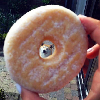

1st predict: Orange , 2nd predict: Bagel , 3rd predict: Banana


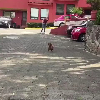

1st predict: Limousine , 2nd predict: Tow_truck , 3rd predict: Shopping_cart


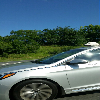

1st predict: Convertible , 2nd predict: Sports_car , 3rd predict: Car_wheel


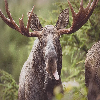

1st predict: Tusker , 2nd predict: Indian_elephant , 3rd predict: Ibex


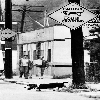

1st predict: Street_sign , 2nd predict: Umbrella , 3rd predict: Traffic_light


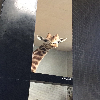

1st predict: Tabby , 2nd predict: Window_screen , 3rd predict: Egyptian_cat


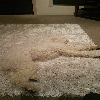

1st predict: Home_theater , 2nd predict: Sandbar , 3rd predict: Television


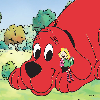

1st predict: Comic_book , 2nd predict: Envelope , 3rd predict: Book_jacket


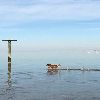

1st predict: Pole , 2nd predict: Lakeside , 3rd predict: Wreck


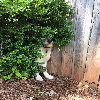

1st predict: Marmot , 2nd predict: Meerkat , 3rd predict: Weasel


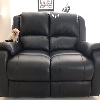

1st predict: Home_theater , 2nd predict: Studio_couch , 3rd predict: Barber_chair


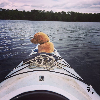

1st predict: Lakeside , 2nd predict: Dock , 3rd predict: Canoe


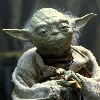

1st predict: Chimpanzee , 2nd predict: Gorilla , 3rd predict: Orangutan


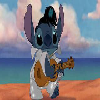

1st predict: Revolver , 2nd predict: Projectile , 3rd predict: Fountain


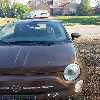

1st predict: Grille , 2nd predict: Beach_wagon , 3rd predict: Convertible


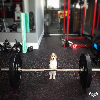

1st predict: Barbell , 2nd predict: Dumbbell , 3rd predict: Go-kart


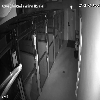

1st predict: Prison , 2nd predict: Dishwasher , 3rd predict: File


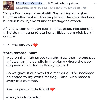

1st predict: Web_site , 2nd predict: Menu , 3rd predict: Crossword_puzzle


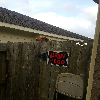

1st predict: Patio , 2nd predict: Prison , 3rd predict: Restaurant


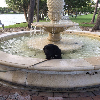

1st predict: Fountain , 2nd predict: American_black_bear , 3rd predict: Sundial


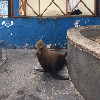

1st predict: Sea_lion , 2nd predict: Mink , 3rd predict: Otter


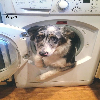

1st predict: Washer , 2nd predict: Dishwasher , 3rd predict: Printer


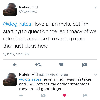

1st predict: Web_site , 2nd predict: Rule , 3rd predict: Envelope


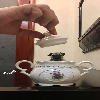

1st predict: Teapot , 2nd predict: Cup , 3rd predict: Coffeepot


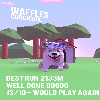

1st predict: Birdhouse , 2nd predict: Can_opener , 3rd predict: Carton


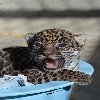

1st predict: Leopard , 2nd predict: Jaguar , 3rd predict: Snow_leopard


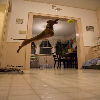

1st predict: Wooden_spoon , 2nd predict: Sliding_door , 3rd predict: Grand_piano


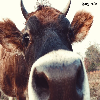

1st predict: Ox , 2nd predict: Bison , 3rd predict: Water_buffalo


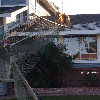

1st predict: Patio , 2nd predict: Window_screen , 3rd predict: Boathouse


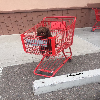

1st predict: Shopping_cart , 2nd predict: Shopping_basket , 3rd predict: Mousetrap


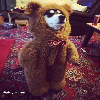

1st predict: Teddy , 2nd predict: Jigsaw_puzzle , 3rd predict: Doormat


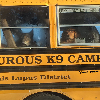

1st predict: School_bus , 2nd predict: Cab , 3rd predict: Crane


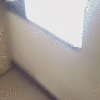

1st predict: Bathtub , 2nd predict: Shower_curtain , 3rd predict: Tub


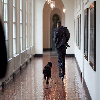

1st predict: Prison , 2nd predict: Palace , 3rd predict: Umbrella


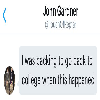

1st predict: Web_site , 2nd predict: Envelope , 3rd predict: Nail


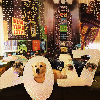

1st predict: Restaurant , 2nd predict: Toyshop , 3rd predict: Paper_towel


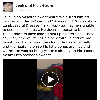

1st predict: Loupe , 2nd predict: Web_site , 3rd predict: Bubble


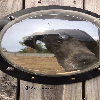

1st predict: Shield , 2nd predict: Barrel , 3rd predict: Sundial


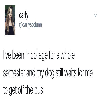

1st predict: Web_site , 2nd predict: Envelope , 3rd predict: Guillotine


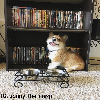

1st predict: Bookcase , 2nd predict: Entertainment_center , 3rd predict: File


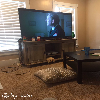

1st predict: Home_theater , 2nd predict: Television , 3rd predict: Entertainment_center


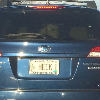

1st predict: Minivan , 2nd predict: Beach_wagon , 3rd predict: Convertible


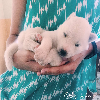

1st predict: Teddy , 2nd predict: Ice_bear , 3rd predict: Christmas_stocking


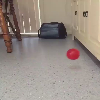

1st predict: Vacuum , 2nd predict: Punching_bag , 3rd predict: Barbell


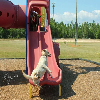

1st predict: Gas_pump , 2nd predict: Harvester , 3rd predict: Swing


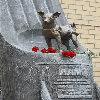

1st predict: Pedestal , 2nd predict: Fountain , 3rd predict: Brass


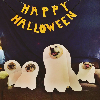

1st predict: Bakery , 2nd predict: Saltshaker , 3rd predict: Teddy


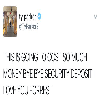

1st predict: Web_site , 2nd predict: Lighter , 3rd predict: Switch


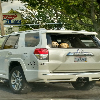

1st predict: Beach_wagon , 2nd predict: Minivan , 3rd predict: Limousine


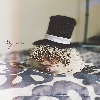

1st predict: Porcupine , 2nd predict: Sea_urchin , 3rd predict: Echidna


In [75]:
#Take a look at the images of 'not dogs'. Only 50 images were studied because it 
#took too much time to run through all the images
LIMIT=50
for index,rows in islice(what_is_it_really.iterrows(),LIMIT) :
    r = requests.get(rows['jpg_url'])
    im = Image.open(BytesIO(r.content))
    new_im= im.resize((100,100))
    display(new_im)
    print("1st predict:",rows['best_prediction'],',',"2nd predict:",rows['second_best_prediction'],',',"3rd predict:",rows['third_best_prediction'])
   
#Conclusion: In most of these pictures the algorithm is right, it is not a dog;
#most cases some other animal like a bear or a rabbit. In cases where the alogrithm
#got it wrong it was mostly because:
#-some other animal or object dominated the picture and the dog was in a tiny corner somewhere in the picture
#-dog was wearing a mask or some fancy object which hid its face and body
#-it was a cartoon image of a dog
#- a dog which was sleeping instead of standing on its four feet
#- a dog in water

In [76]:
master_df.favorite_count.sort_values(ascending=False).head()

860    160368.0
347    136726.0
443    123902.0
119    119211.0
899    118481.0
Name: favorite_count, dtype: float64

In [77]:
master_df.retweet_count.sort_values(ascending=False).head()

860    80199.0
899    59446.0
443    58468.0
347    45253.0
63     41716.0
Name: retweet_count, dtype: float64

In [78]:
master_df.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,ratings,...,second_best_prediction,second_best_prediction_confidence,second_prediction_if_dog,third_best_prediction,third_best_prediction_confidence,third_prediction_if_dog,retweet_count,favorite_count,followers_count,tweet_text
1603,677662372920729601,2015-12-18 01:31:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","In honor of the new Star Wars movie. Here's Yoda pug. 12/10 pet really well, would I https://t.co/pvjdRn00XH",https://twitter.com/dog_rates/status/677662372920729601/photo/1,12.0,10.0,None,,1.2,...,Trench_coat,0.127086,False,Cloak,0.071439,False,972.0,1963.0,8367899.0,"In honor of the new Star Wars movie. Here's Yoda pug. 12/10 pet really well, would I https://t.co/pvjdRn00XH"


In [107]:
#Only the first prediction calls it not a dog but the subsequent ones do
first_not_a_dog_urls=master_df.query('first_prediction_if_dog==False & second_prediction_if_dog ==True & third_prediction_if_dog ==True')[['jpg_url','best_prediction','second_best_prediction','third_best_prediction']]
len(first_not_a_dog_urls)


95

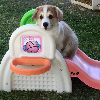

1st predict: Tricycle , 2nd predict: Labrador_retriever , 3rd predict: Pembroke


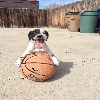

1st predict: Basketball , 2nd predict: Pug , 3rd predict: Dalmatian


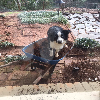

1st predict: Barrow , 2nd predict: Bernese_mountain_dog , 3rd predict: Entlebucher


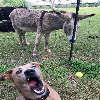

1st predict: Tennis_ball , 2nd predict: Kelpie , 3rd predict: Malinois


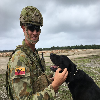

1st predict: Military_uniform , 2nd predict: Labrador_retriever , 3rd predict: Groenendael


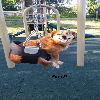

1st predict: Swing , 2nd predict: Norwich_terrier , 3rd predict: Pembroke


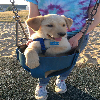

1st predict: Swing , 2nd predict: American_staffordshire_terrier , 3rd predict: Staffordshire_bullterrier


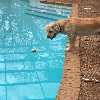

1st predict: Ice_bear , 2nd predict: Soft-coated_wheaten_terrier , 3rd predict: Irish_terrier


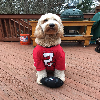

1st predict: Teddy , 2nd predict: Toy_poodle , 3rd predict: Standard_poodle


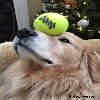

1st predict: Tennis_ball , 2nd predict: Golden_retriever , 3rd predict: Kuvasz


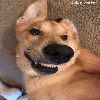

1st predict: Dingo , 2nd predict: German_shepherd , 3rd predict: Pembroke


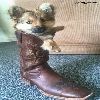

1st predict: Cowboy_boot , 2nd predict: Chihuahua , 3rd predict: Papillon


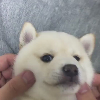

1st predict: Ice_bear , 2nd predict: Samoyed , 3rd predict: Eskimo_dog


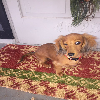

1st predict: Doormat , 2nd predict: Golden_retriever , 3rd predict: Cocker_spaniel


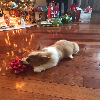

1st predict: Siamese_cat , 2nd predict: Pembroke , 3rd predict: Cardigan


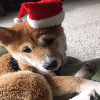

1st predict: Dingo , 2nd predict: Pembroke , 3rd predict: Basenji


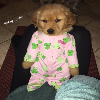

1st predict: Seat_belt , 2nd predict: Toy_poodle , 3rd predict: Golden_retriever


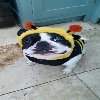

1st predict: Doormat , 2nd predict: French_bulldog , 3rd predict: Boston_bull


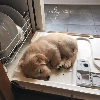

1st predict: Dishwasher , 2nd predict: Golden_retriever , 3rd predict: Chow


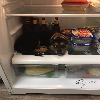

1st predict: Refrigerator , 2nd predict: Malinois , 3rd predict: Kelpie


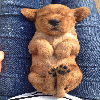

1st predict: Teddy , 2nd predict: Toy_poodle , 3rd predict: Chow


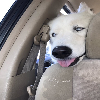

1st predict: Seat_belt , 2nd predict: Eskimo_dog , 3rd predict: Samoyed


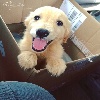

1st predict: Seat_belt , 2nd predict: Golden_retriever , 3rd predict: Labrador_retriever


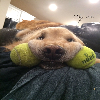

1st predict: Tennis_ball , 2nd predict: Chesapeake_bay_retriever , 3rd predict: Labrador_retriever


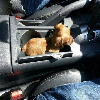

1st predict: Seat_belt , 2nd predict: Miniature_pinscher , 3rd predict: Brabancon_griffon


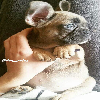

1st predict: Cougar , 2nd predict: French_bulldog , 3rd predict: Boxer


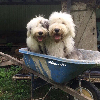

1st predict: Barrow , 2nd predict: Old_english_sheepdog , 3rd predict: Komondor


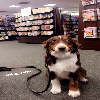

1st predict: Bookshop , 2nd predict: Cardigan , 3rd predict: Bernese_mountain_dog


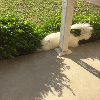

1st predict: Skunk , 2nd predict: Old_english_sheepdog , 3rd predict: Siberian_husky


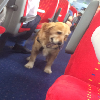

1st predict: Seat_belt , 2nd predict: Golden_retriever , 3rd predict: Tibetan_mastiff


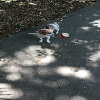

1st predict: Goose , 2nd predict: English_setter , 3rd predict: Basset


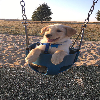

1st predict: Swing , 2nd predict: Labrador_retriever , 3rd predict: Eskimo_dog


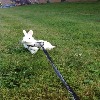

1st predict: Sulphur-crested_cockatoo , 2nd predict: West_highland_white_terrier , 3rd predict: Samoyed


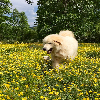

1st predict: Rapeseed , 2nd predict: Standard_poodle , 3rd predict: Great_pyrenees


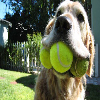

1st predict: Tennis_ball , 2nd predict: Basset , 3rd predict: Golden_retriever


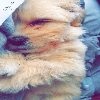

1st predict: Handkerchief , 2nd predict: Pomeranian , 3rd predict: Shih-tzu


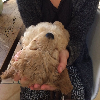

1st predict: Teddy , 2nd predict: Toy_poodle , 3rd predict: Lakeland_terrier


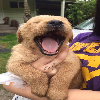

1st predict: Teddy , 2nd predict: Chow , 3rd predict: Irish_terrier


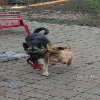

1st predict: Swing , 2nd predict: Soft-coated_wheaten_terrier , 3rd predict: Tibetan_terrier


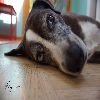

1st predict: Badger , 2nd predict: Boston_bull , 3rd predict: Kelpie


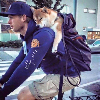

1st predict: Dingo , 2nd predict: Chihuahua , 3rd predict: Cardigan


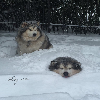

1st predict: Timber_wolf , 2nd predict: Malamute , 3rd predict: Siberian_husky


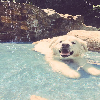

1st predict: Ice_bear , 2nd predict: Great_pyrenees , 3rd predict: Labrador_retriever


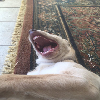

1st predict: Dingo , 2nd predict: Ibizan_hound , 3rd predict: Eskimo_dog


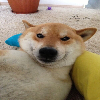

1st predict: Dingo , 2nd predict: Pembroke , 3rd predict: Basenji


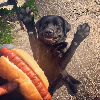

1st predict: Hotdog , 2nd predict: Rottweiler , 3rd predict: Labrador_retriever


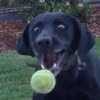

1st predict: Tennis_ball , 2nd predict: German_short-haired_pointer , 3rd predict: Labrador_retriever


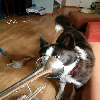

1st predict: Muzzle , 2nd predict: Basenji , 3rd predict: Boston_bull


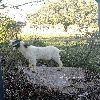

1st predict: Ram , 2nd predict: Kuvasz , 3rd predict: Great_pyrenees


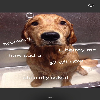

1st predict: Web_site , 2nd predict: Labrador_retriever , 3rd predict: Golden_retriever


In [83]:
LIMIT=50
for index,row in islice(first_not_a_dog_urls.iterrows(),LIMIT):
  
    r = requests.get(row['jpg_url'])
    im = Image.open(BytesIO(r.content))
    new_im= im.resize((100,100))
   
    display(new_im)
    print("1st predict:",row['best_prediction'],',',"2nd predict:",row['second_best_prediction'],',',"3rd predict:",row['third_best_prediction'])
    
#Conclusion:All of them are dog pictures except one where its a giraffe. The first 
#prediction got it wrong because some pictures may be tricky for algo as there are other
#objects present in the picture 
#-the dogs in the pictures are either wearing a costume or sitting inside something like a car or a box
#-dogs are holding some object

In [95]:
#Retweet Count Analysis
retweets=master_df.sort_values(by='retweet_count',ascending=False)
print(retweets.ratings.mean())

#Average rating of 100 most retweeted tweets
hundred_most_retweeted_avgrating=retweets.iloc[:100].ratings.mean()
print(hundred_most_retweeted_avgrating)

#Conclusion:Most retweeted have a significantly higher average rating

1.0566308387744863
1.250499999999999


In [96]:
#Favorite Count Analysis
favorites=master_df.sort_values(by='favorite_count',ascending=False)
print(favorites.ratings.mean())

#Average rating of 100 most favorited tweets
hundred_most_favorite_avgrating=favorites.iloc[:100].ratings.mean()
print(hundred_most_favorite_avgrating)

#Conclusion:Most favorited have a slightly higher average rating

1.056630838774486
1.2694999999999994


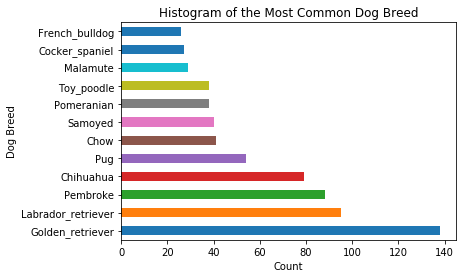

In [97]:
#Most common Dog Breeds
most_common_dogs = master_df.groupby('best_prediction').filter(lambda x: len(x) >= 25)

most_common_dogs.best_prediction.value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Common Dog Breed')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

Text(0.5,1,'Distribution of Dog Ratings')

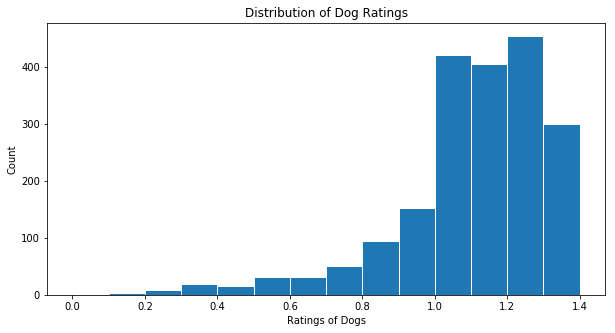

In [98]:
#Distribution of Dog Ratings
plt.figure(figsize = (10, 5))
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4]
plt.hist(x=master_df.ratings,edgecolor='white',bins=bins)
plt.xlabel('Ratings of Dogs')
plt.ylabel('Count')
plt.title('Distribution of Dog Ratings')

#Conclusion: Most dogs have been rated 10 and above since most of the 
#dogs have ratings above 1

In [99]:
master_df.ratings.value_counts()

1.200    454
1.000    421
1.100    403
1.300    262
0.900    152
0.800     95
0.700     51
1.400     36
0.500     32
0.600     32
0.300     19
0.400     15
0.200      9
0.100      4
0.000      2
2.600      1
1.127      1
1.350      1
0.975      1
Name: ratings, dtype: int64

In [100]:
#Remove Outliers for the boxplot to come out nice
master_df=master_df[master_df['ratings']!=177.6]
master_df=master_df[master_df['ratings']!=42]

                  1685
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

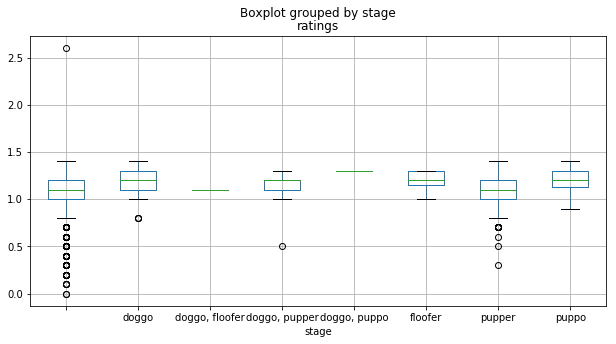

In [101]:
#Boxplot Rating Distribution by dog stages
master_df.boxplot(column='ratings', 
   by = 'stage', figsize=(10, 5));

master_df.stage.value_counts()

#Conclusion:Pupper has the lowest median rating(1.1), also pupper is the most common stage.
#Most dogs have a median rating of 1.2 and all the dogs have Q1s above 1 that means 
#75% of the dogs are rated more than 10
#Floofer has the least representation in terms of data, therefore its distribution
#is not very reliable

In [102]:
master_df.groupby('stage')['ratings'].describe()
# No standard deviationf or doggo,floofer OR doggo,puppo beacuse there is only one
#data point

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
,1685.0,1.047967,0.226504,0.0,1.000,1.1,1.2,2.6
doggo,63.0,1.188889,0.147135,0.8,1.100,1.2,1.3,1.4
"doggo, floofer",1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.1
"doggo, pupper",9.0,1.100000,0.239792,0.5,1.100,1.2,1.2,1.3
"doggo, puppo",1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.3
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.3
pupper,203.0,1.063680,0.172818,0.3,1.000,1.1,1.2,1.4
puppo,22.0,1.200000,0.130931,0.9,1.125,1.2,1.3,1.4


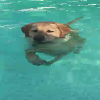

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


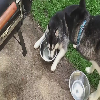

Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC


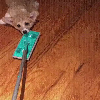

This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d


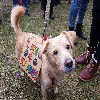

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


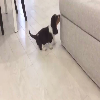

This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY


In [113]:
#Fun Analysis : top 5 most retweeted tweets
LIMIT=5
for index,row in islice(retweets.iterrows(),LIMIT):
     r = requests.get(row['jpg_url'])
     im = Image.open(BytesIO(r.content))
     new_im= im.resize((100,100))
     display(new_im)
     print(row['text'])